In [1]:
import pandas as pd
import numpy as np

import utils
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
from ego_graph_dataset import *

In [3]:
dataset_name = 'mutagenicity'
available_metrics = ["sum", "entropy", "cosine", "cheb", "likelyhood", "likelyhood_max", "hamming",
                           "focal_loss"]

In [ ]:
def plot_explanation(metric='cosine', rule=23, graph_id=1, fixed_size=True, size=3):
    data = select_active_graph(f"/home/elouan/epita/lre/lre/first_GNN/lrde/optimal_transport/optimal_transport_for_gnn/activ_ego/mutag_{rule}labels_egos.txt", index_to_select=[graph_id])
    data = data[0]
    df_node_score = pd.read_csv(os.path.join("./results/mutagenicity/gcn/gstarx",
                             f"result_{dataset_name}_{rule}_{graph_id}.csv"))
    node_score = df_node_score[metric].values
    coalition = scores2coalition(node_score, sparsity=0.5, fixed_size=True, size=3)
    title_sentence = f"Explanation {dataset_name} rule {rule} with {metric} for graph {graph_id}:"
    node_attrs = data.x
    data['label'] = node_attrs
    plot = PlotUtils(dataset_name, is_show=True)
    plot.plot(utils.to_networkx(data,to_undirected=True, node_attrs=['label', 'center']),
              coalition, x=data.x,words='', title_sentence=title_sentence,figname='test.png')

In [5]:
def plot_correlation_matrix(rule, graph_id,method='kendall'):
    df_node_score = pd.read_csv(os.path.join("./results/mutagenicity/gcn/gstarx",
                             f"result_{dataset_name}_{rule}_{graph_id}.csv"))
    corr = df_node_score.corr(method=method)
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)
    plt.show()

In [9]:
def plot_explanation_and_correlation(rule, graph_id, method='kendall', metric='cosine'):
    plot_explanation(metric=metric, rule=rule, graph_id=graph_id)
    plot_correlation_matrix(rule=rule, graph_id=graph_id, method=method)

def plot_explanation_for_list_of_graphs(rule, list_of_graphs, metric='cosine', method='kendall'):
    for graph_id in list_of_graphs:
        plot_explanation(metric=metric, rule=rule, graph_id=graph_id)
        df_nodes_score = pd.read_csv(os.path.join("./results/mutagenicity/gcn/gstarx",
                             f"result_{dataset_name}_{rule}_{graph_id}.csv"))
        print(np.sort(df_nodes_score[metric].values))

def plot_explanation_and_corr_for_list_of_graphs(rule, list_of_graphs, metrics=['cosine'], method='kendall'):
    for graph_id in list_of_graphs:
        for metric in metrics:
            plot_explanation_and_correlation(rule=rule, graph_id=graph_id, method=method, metric=metric)

Number of graphs: 3490


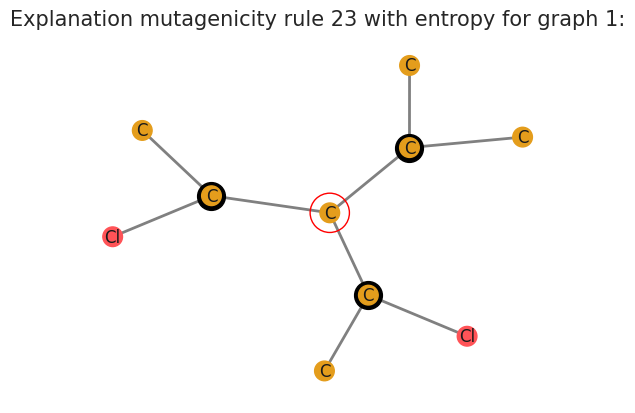

[-74.28086853 -74.28038025 -43.23755646 -43.23753738 -43.23749924
 -43.23721313  31.12254333  31.12259102  57.81666183  57.81701279]
Number of graphs: 3490


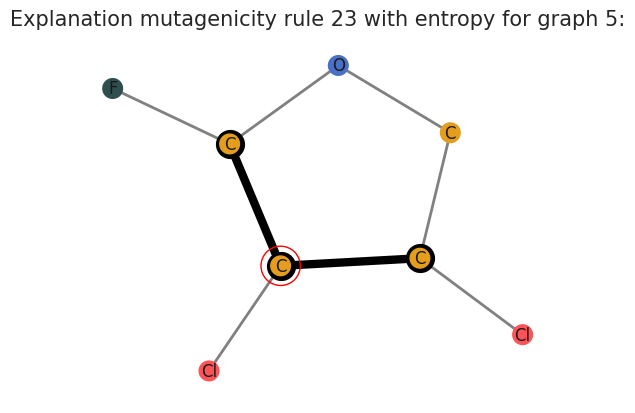

[-74.28097534 -74.28039551 -51.5457077  -23.79007721  -4.70017147
  30.79803848  50.34796906  50.34815216]
Number of graphs: 3490


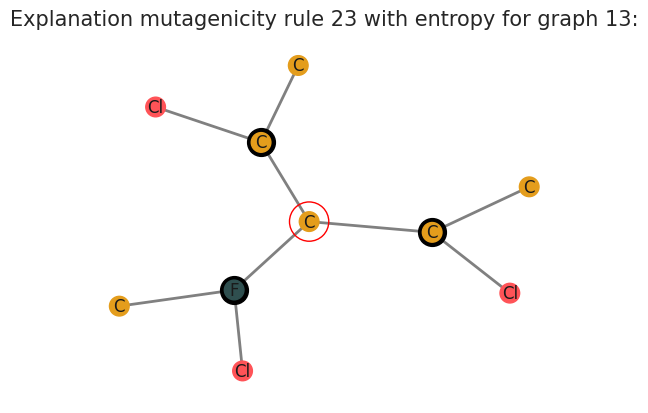

[-74.28091431 -74.28084564 -74.28037262 -43.23754883 -43.23752213
 -43.23725128  38.26675034  49.50885773  57.81655121  57.81692505]
Number of graphs: 3490


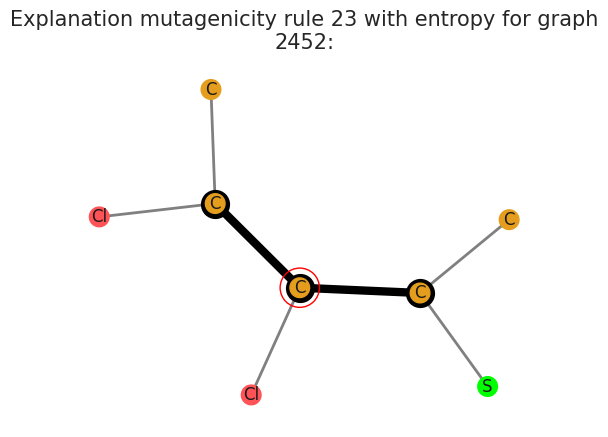

[-74.28093719 -74.28091431 -63.25856018 -43.23749924 -43.23727036
  48.33894348  57.81682587  57.81687546]


In [12]:
plot_explanation_for_list_of_graphs(rule=23, list_of_graphs=[1,5,13,2452], metric='entropy', method='kendall')

In [1]:
from pattern_mining import pattern_frequency
import numpy as np
frequent_itemsets, a_rules = pattern_frequency('results/mutagenicity/gcn/gstarx', metric="entropy", rule=23,
                  dataset_name="mutagenicity", graph_ids=np.arange(0, 2581), fixed_size=True, size=3, sparsity=0.5)


Number of graphs: 3490


100%|██████████| 2581/2581 [00:04<00:00, 536.91it/s]

Skipped 173 graphs because the corresponding file is empty. The size of the graph can lead to a to long HN value computation and therefore, we chose to skip the graph. Here is the detail of skipped graphs with their size:
 [(17, 13), (18, 13), (45, 11), (72, 11), (80, 11), (81, 11), (85, 11), (89, 12), (90, 11), (92, 16), (99, 11), (140, 12), (146, 11), (149, 11), (150, 11), (158, 11), (159, 11), (181, 12), (185, 15), (196, 12), (197, 16), (198, 16), (288, 11), (313, 11), (326, 11), (328, 11), (345, 11), (406, 11), (425, 13), (434, 12), (438, 11), (458, 11), (459, 11), (460, 11), (461, 11), (489, 11), (546, 11), (551, 13), (561, 11), (562, 16), (563, 13), (564, 13), (569, 11), (588, 11), (589, 11), (605, 11), (619, 11), (656, 12), (658, 11), (685, 12), (702, 13), (718, 11), (734, 13), (802, 15), (805, 11), (814, 11), (833, 13), (851, 13), (862, 11), (872, 11), (908, 11), (928, 11), (968, 11), (969, 12), (985, 11), (988, 13), (1044, 12), (1049, 11), (1068, 11), (1082, 11), (1084, 11), (


/home/elouan/epita/lre/lre/first_GNN/venv/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [3]:
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
1,1.000000,(Cl)
0,0.997508,(C)
3,0.997508,"(C, Cl)"
2,0.442276,(F)
5,0.442276,"(F, Cl)"
4,0.439784,"(C, F)"
6,0.439784,"(C, F, Cl)"


In [4]:
a_rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(C),(Cl),0.997508,1.000000,0.997508,1.000000,1.00000,0.00000,inf,0.000000
3,(F),(Cl),0.442276,1.000000,0.442276,1.000000,1.00000,0.00000,inf,0.000000
4,"(C, F)",(Cl),0.439784,1.000000,0.439784,1.000000,1.00000,0.00000,inf,0.000000
1,(Cl),(C),1.000000,0.997508,0.997508,0.997508,1.00000,0.00000,1.000000,0.000000
2,(F),(C),0.442276,0.997508,0.439784,0.994366,0.99685,-0.00139,0.442276,-0.005634
5,"(F, Cl)",(C),0.442276,0.997508,0.439784,0.994366,0.99685,-0.00139,0.442276,-0.005634
6,(F),"(C, Cl)",0.442276,0.997508,0.439784,0.994366,0.99685,-0.00139,0.442276,-0.005634


# TODO
- [ ] approximation de la HN value pour les graphes >10
- [ ] sous-graph dans les transactions

In [1]:
from build_transaction import build_counting_transaction
import numpy as np

In [2]:
transactions = build_counting_transaction('results/mutagenicity/gcn/gstarx', metric="entropy", rule=23,
                  dataset_name="mutagenicity", graph_ids=np.arange(0, 2581), fixed_size=True, size=3, sparsity=0.5)

Number of graphs: 3490


100%|██████████| 2581/2581 [00:04<00:00, 602.53it/s]

Skipped 173 graphs because the corresponding file is empty. The size of the graph can lead to a to long HN value computation and therefore, we chose to skip the graph. Here is the detail of skipped graphs with their size:
 [(17, 13), (18, 13), (45, 11), (72, 11), (80, 11), (81, 11), (85, 11), (89, 12), (90, 11), (92, 16), (99, 11), (140, 12), (146, 11), (149, 11), (150, 11), (158, 11), (159, 11), (181, 12), (185, 15), (196, 12), (197, 16), (198, 16), (288, 11), (313, 11), (326, 11), (328, 11), (345, 11), (406, 11), (425, 13), (434, 12), (438, 11), (458, 11), (459, 11), (460, 11), (461, 11), (489, 11), (546, 11), (551, 13), (561, 11), (562, 16), (563, 13), (564, 13), (569, 11), (588, 11), (589, 11), (605, 11), (619, 11), (656, 12), (658, 11), (685, 12), (702, 13), (718, 11), (734, 13), (802, 15), (805, 11), (814, 11), (833, 13), (851, 13), (862, 11), (872, 11), (908, 11), (928, 11), (968, 11), (969, 12), (985, 11), (988, 13), (1044, 12), (1049, 11), (1068, 11), (1082, 11), (1084, 11), (

In [3]:
transactions.head()

0    [C1, C2, C3, C4, Cl1, Cl2, Cl3]
1     [C1, C2, C3, C4, C5, Cl1, Cl2]
2     [C1, C2, C3, C4, C5, Cl1, Cl2]
3     [C1, C2, C3, C4, C5, Cl1, Cl2]
4              [C1, C2, O1, Cl1, F1]
dtype: object

In [4]:
# Perform LCM closed pattern mining
from skmine.itemsets import LCM

In [5]:
lcm = LCM(min_supp=1000, n_jobs=4)

In [6]:
pattern = lcm.fit_transform(transactions)
print(pattern.shape)
pattern

(11, 2)


,itemset,support
0,[Cl1],2408
1,"[C1, Cl1]",2402
2,"[C1, C2, Cl1]",2335
3,"[Cl1, Cl2]",1878
4,"[C1, Cl1, Cl2]",1872
5,"[C1, C2, Cl1, Cl2]",1805
6,"[C1, C2, C3, Cl1]",1498
7,"[C1, C2, C3, Cl1, Cl2]",1179
8,"[Cl1, F1]",1065
9,"[C1, Cl1, F1]",1059
